In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Chromosome Decode from binary to decimal

In [2]:
normalize_decimal = lambda x, Li: (x) / (math.pow(2, Li)-1)
real_data = lambda x, Lo,Hi : Lo + x  * (Hi - Lo)

def binary_to_decimal(binary_number):
    decimal_number = 0
    Li = len(binary_number) - 1
    for i in binary_number:
        decimal_number += (int(i) * math.pow(2, Li))
        Li = Li - 1
    return int(decimal_number)

def chrome_decode(population, BS, Lo, Hi):
    Li = BS[0]
    real_datas = []
    for i in population:
        x1= binary_to_decimal((i[0:BS[0]]))
        x2 = binary_to_decimal((i[BS[1]:]))
        norm_x1 = normalize_decimal(x1,Li)
        norm_x2 = normalize_decimal(x2,Li)

        real_datas.append(
            [real_data(norm_x1, Lo[0], Hi[0]),real_data(norm_x2, Lo[1], Hi[1])]
        )

    return np.array(real_datas)


### making selection_probability,result_fit,average_fit,max_fit,optimized_soloution

In [3]:
fit = lambda x1,x2 : (1 + math.cos(2 * math.pi * x1 * x2)) * math.exp(-((abs(x1)) + abs(x2)) / 2)

def fit_eval(real_val, N):
    result_fit = []
    selection_probability = []

    for i in range(N):
        x = real_val[i]
        result_fit.append(fit(x[0],x[1]))
    
    selection_probability = list(map(lambda x : x/sum(result_fit),result_fit))
    average_fit = np.mean(result_fit)
    max_fit = max(result_fit)
    max_Index = result_fit.index(max_fit) #TODO check for better soloution
    optimized_soloution = real_val[max_Index]
    
    return selection_probability,result_fit,average_fit,max_fit,optimized_soloution



# mating pool generation

In [4]:
def g_roulette_wheel(population, N, selection_probability):
       index = [i for i in range(N)]
       result = []
       
       for i in range(N):
              random_choice = np.random.choice(index,p=selection_probability)
              result.append(random_choice)

       mating_pool = np.array([population[i] for i in result])
       return mating_pool

# parent crossover

In [5]:
def g_crossover(mating_pool, Pc, N, L):
    temp = []
    parent_number = np.random.permutation(N)

    for i in range(0,N,2):
        cut_point = random.randint(1,L)
        parent1 = mating_pool[parent_number[i]]
        parent2 = mating_pool[parent_number[i+1]]

        random_number = random.random() 
        if random_number < Pc:
            offspring1 = np.append(parent1[:cut_point],parent2[cut_point:])
            offspring2 = np.append(parent2[:cut_point],parent1[cut_point:])
            temp.append(offspring1)
            temp.append(offspring2)
        else:
            temp.append(parent1)
            temp.append(parent2)
            
        new_population = np.array(temp)
        
    return new_population

# offsprings mutation

In [6]:
def g_mutation(new_pop, Pm, N, L):
    mask = (np.array([[random.random() for i in range(L)] for j in range(N)]) <= Pm)
    population = np.bitwise_xor(new_pop,mask)
    return population

# Main code

In [7]:
if __name__ == "__main__":
    N = 50
    Pc = 0.9
    Pm = 0.005
    number_to_run = 100
    BS = [10,10]
    L = sum(BS)
    Lo = [-4,-1.5]
    Hi = [2,1]
    best_so_far = []
    average_fitness = []
    population = np.array([[random.randint(0,1) for i in range(L)] for j in range(N)])

    for i in range(number_to_run):
        real_val = chrome_decode(population, BS,Lo,Hi)
        selection_probability,result_fit,average_fit,max_fit,optimized_soloution = fit_eval(real_val, N)
        best_so_far.append(max_fit)
        final_soloution = optimized_soloution
        
        if max_fit > best_so_far[i-1]:
            final_soloution = optimized_soloution
        else:
          best_so_far[i] = best_so_far[i-1]

        
        average_fitness.append(average_fit)
        mating_pool = g_roulette_wheel(population, N, selection_probability)
        new_population = g_crossover(mating_pool, Pc, N, L)
        population = g_mutation(new_population, Pm, N, L)
      

# Efficiency chart

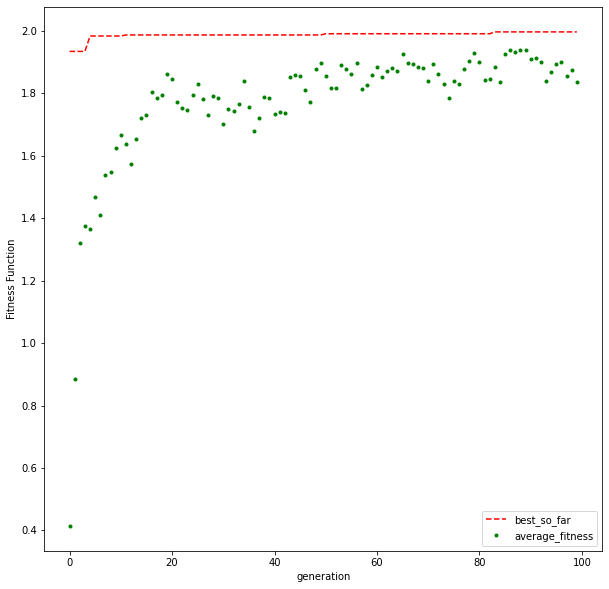

In [8]:
%matplotlib inline


x = [i for i in range(number_to_run)]
fig = plt.figure(figsize=(10,10))
plt.plot(x,best_so_far,"r--",label="best_so_far")
plt.plot(x,average_fitness,"g.",label="average_fitness")
plt.ylabel('Fitness Function')
plt.xlabel("generation")
plt.legend()
plt.show()

وقتی که نمودار را نگاه میکنیم متوجه میشویم که الگوریتم به خوبی کار میکند و جوابهای خوبی تولید میکند پس نسخه‌ی باینتری الگوریتم ژنتیک برای این مسئله‌ی نمونه به خوبی کار میکند

# fitness function 3d plot

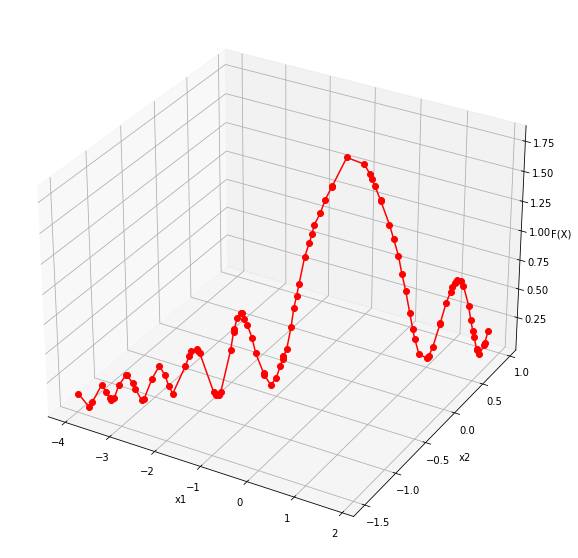

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x = np.sort(np.random.uniform(-4,2,100))
y = np.sort(np.random.uniform(-1.5,1,100))

z =[fit(x[0],x[1]) for x in zip(x,y)]



ax.plot3D(x, y, z, c='r', marker='o')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('F(X)')

plt.show()